# On-Axis Field Due to a Current Loop

*This simple formula uses the [Law of Biot Savart](../basics/biotsavart.html), integrated over a circular current loop to obtain the magnetic field at any point along the axis of the loop.*

![Infinite straight wire](current_loop.png)

$B = \frac {\mu_o i r^2}{2(r^2 + x^2)^{\frac 3 2}}$

**B** is the magnetic field, in teslas, at any point on the axis of the current loop. The direction of the field is perpendicular to the plane of the loop.

$\mathbf \mu_o$ is the permeability constant (1.26x10<sup>-6</sup> Hm<sup>-1</sup>)

**i** is the current in the wire, in amperes.

**r** is the radius of the current loop, in meters.

**x** is the distance, on axis, from the center of the current loop to the location where the magnetic field is calculated, in meters.

## Special Case: *x* = 0

$B = \frac {\mu_o i}{2 r}$

## Special Case: *x* >> 0

$B = \frac {\mu_o i r^2}{2 x^3}$

Note that this is equivalent to the expression for on-axis magnetic field due to a magnetic dipole:

$B = \frac {\mu_o i A}{2 \pi x^3}$

where **A** is the area of the current loop, or $\pi r^2$.

## Code Example

The following IPython code illustrates how to compute the on-axis field due to a simple current loop.

In [3]:
%matplotlib inline
from scipy.special import ellipk, ellipe, ellipkm1
from numpy import pi, sqrt, linspace
from pylab import plot, xlabel, ylabel, suptitle, legend, show

uo = 4E-7*pi     # Permeability constant - units of H/m

# On-Axis field = f(current and radius of loop, x of measurement point)
def Baxial(i, a, x, u=uo):
    if a == 0:
        if x == 0:
            return NaN
        else:
            return 0.0
    else:
        return (u*i*a**2)/2.0/(a**2 + x**2)**(1.5)

Use the `Baxial` function to compute the central field of a unit loop (1 meter radius, 1 ampere of current), in teslas:

In [19]:
print("{:.3} T".format(Baxial(1, 1, 0)))

6.28e-07 T


You can try selecting your own current (a), radius (m) and axial position (m) combination to see what the resulting field is:

In [39]:
from ipywidgets import interactive
from IPython.display import display

def B(i, a, x):
    return "{:.3} T".format(Baxial(i,a,x))

v = interactive(B, i=(0.0, 20.0), a=(0.0, 10.0), x=(0.0, 10.0))
display(v)

'6.28e-07 T'

Now plot the field intensity, as a fraction of the central field, at various positions along the axis (measured as multiples of the coil radius):

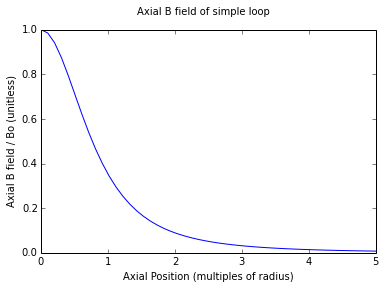

In [9]:
axiallimit = 5.0 # meters from center
radius = 1.0 # loop radius in meters
X = linspace(0,axiallimit)
Bcenter = Baxial(1,1,0)
plot(X, [Baxial(1,1,x)/Bcenter for x in X])
xlabel("Axial Position (multiples of radius)")
ylabel("Axial B field / Bo (unitless)")
suptitle("Axial B field of simple loop")
show()

---
[Magnet Formulas](../index.html), © 2018 by Eric Dennison. Source code and License on [Github](https://github.com/tiggerntatie/emagnet.py)